In [67]:
import pandas as pd

# Load data from CSV file
csv_file_path = '/Users/PavelKudrautsau/Downloads/paysera2.csv'  # Update this path
df = pd.read_csv(csv_file_path)

# Assuming the CSV contains 'Created' and 'Resolved' columns
df['Created'] = pd.to_datetime(df['Created'])
df['Resolved'] = pd.to_datetime(df['Resolved'])
df['Delivery_Time'] = (df['Resolved'] - df['Created']).dt.days

In [88]:
import pandas as pd

# Load data from CSV file
csv_file_path = '/Users/PavelKudrautsau/Downloads/paysera2.csv' 

# Load the CSV data into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows to confirm it's loaded correctly
df.head()

,Issue Type,Summary,Status,Updated,Issue key,Issue id,Parent id,Created,Priority,Reporter,Assignee,Resolved
0,Code review,Code Review,Closed,2024-02-23 13:52,SUPPORT-93767,293603,283729.0,2024-02-22 09:38,High,lasha.vasadze@paysera.net,tadas.putjato@paysera.net,2024-02-22 17:32
1,Code review,Code Review,Closed,2024-02-22 17:34,SUPPORT-93752,293491,291659.0,2024-02-21 18:44,High,tadas.putjato@paysera.net,lasha.vasadze@paysera.net,2024-02-22 11:43
2,Code review,Code Review,Closed,2024-02-22 21:54,SUPPORT-93584,292985,258752.0,2024-02-20 10:09,High,papuna.berdzulishvili@paysera.net,tadas.putjato@paysera.net,2024-02-22 21:54
3,Code review,Code Review,Closed,2024-02-21 20:45,SUPPORT-93574,292965,292209.0,2024-02-19 19:41,Unspecified,tadas.putjato@paysera.net,papuna.berdzulishvili@paysera.net,2024-02-20 13:53
4,Story,"Cash_out - create automatic solution, not to f...",Closed,2024-02-20 10:54,SUPPORT-93567,292956,NaN,2024-02-19 18:23,ASAP,pavel.kudrautsau@paysera.net,NaN,2024-02-20 10:54


In [89]:
# Convert 'Created' and 'Resolved' columns to datetime
df['Created'] = pd.to_datetime(df['Created'])
df['Resolved'] = pd.to_datetime(df['Resolved'])

# Calculate the delivery time in days
df['Delivery_Time'] = (df['Resolved'] - df['Created']).dt.days

# Display the DataFrame to verify the changes
df[['Created', 'Resolved', 'Delivery_Time']].head()

,Created,Resolved,Delivery_Time
0,2024-02-22 09:38:00,2024-02-22 17:32:00,0
1,2024-02-21 18:44:00,2024-02-22 11:43:00,0
2,2024-02-20 10:09:00,2024-02-22 21:54:00,2
3,2024-02-19 19:41:00,2024-02-20 13:53:00,0
4,2024-02-19 18:23:00,2024-02-20 10:54:00,0


In [92]:
import numpy as np

def monte_carlo_simulation(df, n_runs, n_tickets):
    results = []
    for _ in range(n_runs):
        # Sample and then take the average of the sample
        sample = df['Delivery_Time'].sample(n_tickets, replace=True).mean()
        results.append(sample)
    return results

# Run the Monte Carlo simulation with the revised function
simulation_results = monte_carlo_simulation(df, 10000000, 374)  # Adjust the number of runs and tickets as needed

In [93]:
# Create a DataFrame from the simulation results
results_df = pd.DataFrame(simulation_results, columns=['Projected Delivery Time'])

# Calculate statistical measures
average_time = results_df['Projected Delivery Time'].mean()
median_time = results_df['Projected Delivery Time'].median()
confidence_interval = np.percentile(results_df['Projected Delivery Time'], [2.5, 97.5])

# Print out the results
print(f"Average Projected Delivery Time: {average_time} days")
print(f"Median Projected Delivery Time: {median_time} days")
print(f"95% Confidence Interval for Projected Delivery Time: {confidence_interval} days")
results_df.describe()

Average Projected Delivery Time: 9.11726810347594 days
Median Projected Delivery Time: 9.10427807486631 days
95% Confidence Interval for Projected Delivery Time: [ 7.86898396 10.43582888] days


,Projected Delivery Time
count,1.000000e+07
mean,9.117268e+00
std,6.546389e-01
min,6.077540e+00
25%,8.668449e+00
50%,9.104278e+00
75%,9.550802e+00
max,1.277273e+01


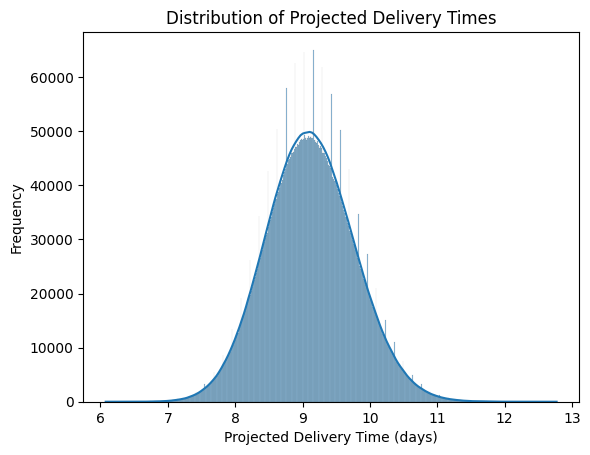

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of projected delivery times
sns.histplot(results_df['Projected Delivery Time'], kde=True)
plt.xlabel('Projected Delivery Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Projected Delivery Times')
plt.show()

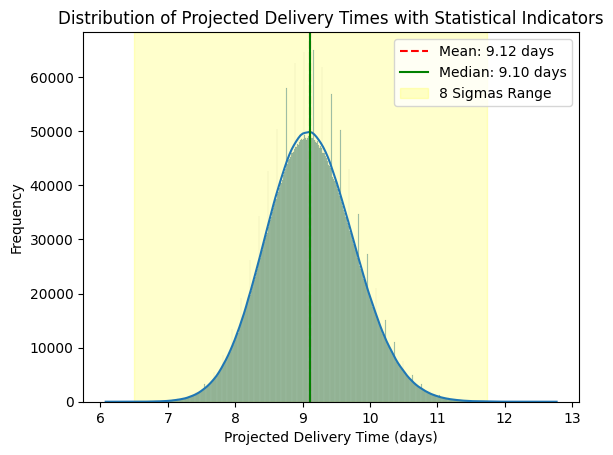

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'results_df' is your DataFrame with the simulation results

# Calculate the average, median, and standard deviation
average_time = results_df['Projected Delivery Time'].mean()
median_time = results_df['Projected Delivery Time'].median()
std_dev = results_df['Projected Delivery Time'].std()
eight_sigmas = std_dev * 8

# Plot the histogram
sns.histplot(results_df['Projected Delivery Time'], kde=True)

# Add vertical lines for mean, median
plt.axvline(average_time, color='r', linestyle='--', label=f'Mean: {average_time:.2f} days')
plt.axvline(median_time, color='g', linestyle='-', label=f'Median: {median_time:.2f} days')

# Add shaded area for 8 sigmas (mean +/- 4 sigmas covers approximately 8 sigmas in total)
plt.axvspan(average_time - 4*std_dev, average_time + 4*std_dev, alpha=0.2, color='yellow', label='8 Sigmas Range')

# Add legend and labels
plt.legend()
plt.xlabel('Projected Delivery Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Projected Delivery Times with Statistical Indicators')
plt.show()

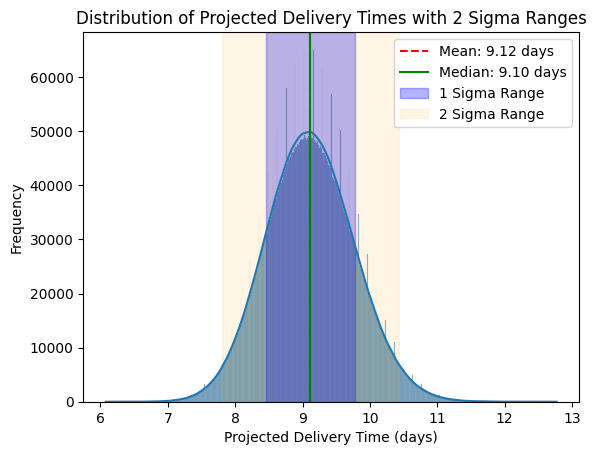

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'results_df' is your DataFrame with the simulation results

# Calculate the average, median, and standard deviation
average_time = results_df['Projected Delivery Time'].mean()
median_time = results_df['Projected Delivery Time'].median()
std_dev = results_df['Projected Delivery Time'].std()

# Create the histogram
sns.histplot(results_df['Projected Delivery Time'], kde=True)

# Add vertical lines for mean and median
plt.axvline(average_time, color='r', linestyle='--', label=f'Mean: {average_time:.2f} days')
plt.axvline(median_time, color='g', linestyle='-', label=f'Median: {median_time:.2f} days')

# Highlight the 1 sigma range with a shade
plt.axvspan(average_time - std_dev, average_time + std_dev, alpha=0.3, color='blue', label='1 Sigma Range')

# Highlight the 2 sigma range with a different shade
plt.axvspan(average_time - 2*std_dev, average_time + 2*std_dev, alpha=0.1, color='orange', label='2 Sigma Range')

# Add legend and labels
plt.legend()
plt.xlabel('Projected Delivery Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Projected Delivery Times with 2 Sigma Ranges')
plt.show()

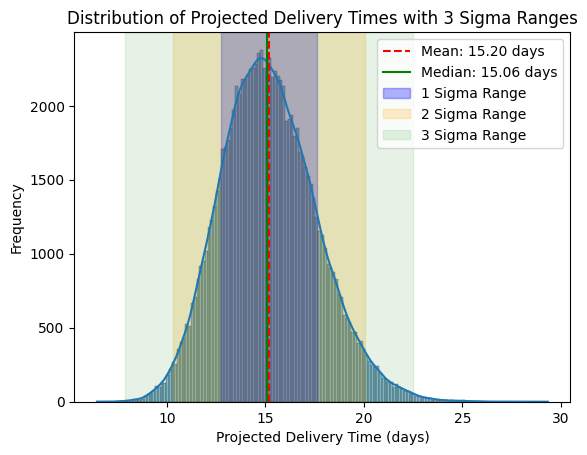

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'results_df' is your DataFrame with the simulation results

# Calculate the average, median, and standard deviation
average_time = results_df['Projected Delivery Time'].mean()
median_time = results_df['Projected Delivery Time'].median()
std_dev = results_df['Projected Delivery Time'].std()

# Create the histogram
sns.histplot(results_df['Projected Delivery Time'], kde=True)

# Add vertical lines for mean and medianb
plt.axvline(average_time, color='r', linestyle='--', label=f'Mean: {average_time:.2f} days')
plt.axvline(median_time, color='g', linestyle='-', label=f'Median: {median_time:.2f} days')

# Highlight the 1 sigma range with a shade
plt.axvspan(average_time - std_dev, average_time + std_dev, alpha=0.3, color='blue', label='1 Sigma Range')

# Highlight the 2 sigma range with a different shade
plt.axvspan(average_time - 2*std_dev, average_time + 2*std_dev, alpha=0.2, color='orange', label='2 Sigma Range')

# Highlight the 3 sigma range with another shade
plt.axvspan(average_time - 3*std_dev, average_time + 3*std_dev, alpha=0.1, color='green', label='3 Sigma Range')

# Add legend and labels
plt.legend()
plt.xlabel('Projected Delivery Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Projected Delivery Times with 3 Sigma Ranges')
plt.show()

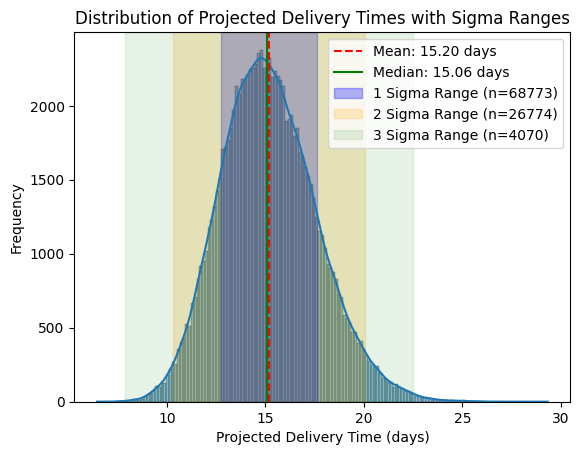

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'results_df' is your DataFrame with the simulation results

# Calculate the average, median, and standard deviation
average_time = results_df['Projected Delivery Time'].mean()
median_time = results_df['Projected Delivery Time'].median()
std_dev = results_df['Projected Delivery Time'].std()

# Calculate the counts within each sigma range
within_1_sigma = ((average_time - std_dev) <= results_df['Projected Delivery Time']) & (results_df['Projected Delivery Time'] <= (average_time + std_dev))
within_2_sigma = ((average_time - 2*std_dev) <= results_df['Projected Delivery Time']) & (results_df['Projected Delivery Time'] <= (average_time + 2*std_dev))
within_3_sigma = ((average_time - 3*std_dev) <= results_df['Projected Delivery Time']) & (results_df['Projected Delivery Time'] <= (average_time + 3*std_dev))

count_within_1_sigma = within_1_sigma.sum()
count_within_2_sigma = within_2_sigma.sum() - count_within_1_sigma
count_within_3_sigma = within_3_sigma.sum() - within_2_sigma.sum()

# Create the histogram
sns.histplot(results_df['Projected Delivery Time'], kde=True)

# Add vertical lines for mean and median
plt.axvline(average_time, color='r', linestyle='--', label=f'Mean: {average_time:.2f} days')
plt.axvline(median_time, color='g', linestyle='-', label=f'Median: {median_time:.2f} days')

# Highlight the sigma ranges with shades
plt.axvspan(average_time - std_dev, average_time + std_dev, alpha=0.3, color='blue', label=f'1 Sigma Range (n={count_within_1_sigma})')
plt.axvspan(average_time - 2*std_dev, average_time + 2*std_dev, alpha=0.2, color='orange', label=f'2 Sigma Range (n={count_within_2_sigma})')
plt.axvspan(average_time - 3*std_dev, average_time + 3*std_dev, alpha=0.1, color='green', label=f'3 Sigma Range (n={count_within_3_sigma})')

# Add legend and labels
plt.legend()
plt.xlabel('Projected Delivery Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Projected Delivery Times with Sigma Ranges')
plt.show()

In [98]:
!pip freeze > all_requirements.txt

# Read the contents of all_requirements.txt
with open('all_requirements.txt', 'r') as file:
    all_packages = file.readlines()

# Assuming you have a list of packages you want to include called 'packages'
# You can obtain this list by manually inspecting your notebook or by
# using a code similar to the one used to generate the requirements file
# in the earlier response
packages = ['pandas', 'numpy', 'matplotlib']  # Example list

# Filter all installed packages to include only the ones used in the notebook
required_packages = [pkg for pkg in all_packages if pkg.split('==')[0].lower() in packages]

# Write the filtered packages to requirements.txt
with open('requirements.txt', 'w') as file:
    file.writelines(required_packages)

# Now, let's print out the contents of requirements.txt to verify
with open('requirements.txt', 'r') as file:
    requirements_content = file.read()

print(requirements_content)

matplotlib==3.8.2
numpy==1.25.2
pandas==2.0.3

